# Retail Sales Case Study

## Introduction
This project involves a comprehensive analysis of a dataset provided by a prominent retail giant. The dataset encompasses crucial information on customer demographics, purchase behavior, and response to marketing campaigns. The primary objective is to glean actionable insights into customer behavior and campaign effectiveness to drive strategic business decisions.

## Dataset Overview
The dataset comprises three essential files:

1. **demographics.txt**: Contains granular details on customer demographics.
2. **behaviour.json**: Provides insightful data regarding customer purchase behavior.
3. **campaign.json**: Offers valuable insights into customer response patterns to marketing campaigns.

### Data Dictionary
#### demographics.txt
- **ID**: Customer's unique identifier
- **Year_Birth**: Customer's birth year
- **Education**: Customer's educational attainment
- **Marital_Status**: Customer's marital status
- **Income**: Customer's annual household income
- **Kidhome**: Number of children in the customer's household
- **Teenhome**: Number of teenagers in the customer's household
- **Dt_Customer**: Date of customer enrollment with the company
- **Country**: Customer's geographical location

#### behaviour.json
- **Recency**: Number of days since the customer's last purchase
- **MntWines**: Expenditure on wine over the past 2 years
- **MntFruits**: Expenditure on fruits over the past 2 years
- **MntMeatProducts**: Expenditure on meat products over the past 2 years
- **MntFishProducts**: Expenditure on fish products over the past 2 years
- **MntSweetProducts**: Expenditure on sweet products over the past 2 years
- **MntGoldProducts**: Expenditure on gold products over the past 2 years
- **NumDealsPurchases**: Number of purchases made with a discount
- **NumWebPurchases**: Number of purchases made through the company's website
- **NumCatalogPurchases**: Number of purchases made using a catalog
- **NumStorePurchases**: Number of purchases made directly in stores
- **NumWebVisitsMonth**: Number of visits to the company's website in the last month

#### campaign.json
- **AcceptedCmp1**: Customer's response to the 1st campaign (1 for acceptance, 0 otherwise)
- **AcceptedCmp2**: Customer's response to the 2nd campaign (1 for acceptance, 0 otherwise)
- **AcceptedCmp3**: Customer's response to the 3rd campaign (1 for acceptance, 0 otherwise)
- **AcceptedCmp4**: Customer's response to the 4th campaign (1 for acceptance, 0 otherwise)
- **AcceptedCmp5**: Customer's response to the 5th campaign (1 for acceptance, 0 otherwise)
- **Response**: Customer's response to the latest campaign (1 for acceptance, 0 otherwise)
- **Complain**: Customer's complaint status (1 if complained in the last 2 years, 0 otherwise)

## Business Problem
The retailer aims to gain a comprehensive understanding of customer responses to various marketing campaigns. Through meticulous analysis of the dataset, we aim to address specific business queries and unearth actionable insights that drive informed decision-making.

### Business Questions
1. **Data Quality and Check (Task 1)**:
    - [Create a consolidated view of the data by integrating information from all files.](#011)
    - [Identify variables necessitating data cleaning and execute requisite data cleansing procedures.](#012)
    - [Generate a meticulous data quality report, highlighting key insights.](#013)
    - [Identify and address any outliers or extreme values within the dataset.](#014)
2. **Business Analysis and Hypothesis (Task 2)**:
    - [Formulate and validate hypotheses regarding customer spending across different product categories and response rates to marketing campaigns.](#021)
    - [Conduct a comprehensive funnel analysis to ascertain campaign acceptance rates.](#022)
    - [Investigate the influence of income levels on expenditure across various product categories.](#023)
    - [Test the hypothesis suggesting that recent customers exhibit lower complaint rates compared to established customers.](#024)
    - [Explore the correlation between customer responses across multiple campaigns.](#025)
    - [Profile customers who exhibit positive response behaviors in marketing campaigns.](#026)

The subsequent sections will delve into the analysis process, aiming to provide actionable insights that cater to the retailer's strategic objectives.

## Data Exploration and Preprocessing

### Importing Necessary Libraries

In [1]:
# Importing essential libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import plotly.graph_objects as go

### Loading Demographics Dataset

In [2]:
# Open the text file
file_path = 'demographics.txt'

# Read the file into a DataFrame using pandas
demog = pd.read_csv(file_path, sep='\t')

# Display first five rows
demog.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,SP
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,GER
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,SP
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,US
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,IND


#### Looking into demographic's info

In [3]:
demog.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              2240 non-null   int64 
 1   Year_Birth      2240 non-null   int64 
 2   Education       2240 non-null   object
 3   Marital_Status  2240 non-null   object
 4    Income         2216 non-null   object
 5   Kidhome         2240 non-null   int64 
 6   Teenhome        2240 non-null   int64 
 7   Dt_Customer     2240 non-null   object
 8   Country         2240 non-null   object
dtypes: int64(4), object(5)
memory usage: 157.6+ KB


### Loading Behaviour Dataset

In [4]:
# Load the JSON data from the file
with open('behaviour.json') as f:
    data = json.load(f)

# Initialize a dictionary to store transformed data
transformed_data = {}

# Iterate over each item in the JSON data
for item in data:
    for key, value in item.items():
        # Extract attribute names and initialize dictionary keys if not already done
        if not transformed_data:
            transformed_data = {attr: [] for attr in value.keys()}
        
        # Append values to the corresponding lists in the dictionary
        for attribute, val in value.items():
            transformed_data[attribute].append(val)
            
        # Append ID values to the 'ID' list
        if 'ID' not in transformed_data:
            transformed_data['ID'] = []
        transformed_data['ID'].append(key)

# Create a DataFrame from the transformed data
behav = pd.DataFrame(transformed_data)

# Reorder columns such that 'ID' appears first
column_order = ['ID'] + [col for col in behav.columns if col != 'ID']
behav = behav[column_order]

# Display the DataFrame
behav.head(10)

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,ID_1826,0,189,104,379,111,189,218,1,4,4,6,1
1,ID_1,0,464,5,64,7,0,37,1,7,3,7,5
2,ID_10476,0,134,11,59,15,2,30,1,3,2,5,2
3,ID_1386,0,10,0,1,0,0,0,1,1,0,2,7
4,ID_5371,0,6,16,24,11,0,34,2,3,1,2,7
5,ID_7348,0,336,130,411,240,32,43,1,4,7,5,2
6,ID_4073,0,769,80,252,15,34,65,1,10,10,7,6
7,ID_1991,0,78,0,11,0,0,7,1,2,1,3,5
8,ID_4047,0,384,0,102,21,32,5,3,6,2,9,4
9,ID_9477,0,384,0,102,21,32,5,3,6,2,9,4


#### Transforming behaviour's table ID column into usable form

In [5]:
# Removing strings from ID column to match with other tables
behav['ID'] = behav['ID'].str.extract('(\d+)').astype(int)
behav.head()

,ID,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1826,0,189,104,379,111,189,218,1,4,4,6,1
1,1,0,464,5,64,7,0,37,1,7,3,7,5
2,10476,0,134,11,59,15,2,30,1,3,2,5,2
3,1386,0,10,0,1,0,0,0,1,1,0,2,7
4,5371,0,6,16,24,11,0,34,2,3,1,2,7


#### Looking into Behaviour's info

In [6]:
behav.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   ID                   2240 non-null   int32
 1   Recency              2240 non-null   int64
 2   MntWines             2240 non-null   int64
 3   MntFruits            2240 non-null   int64
 4   MntMeatProducts      2240 non-null   int64
 5   MntFishProducts      2240 non-null   int64
 6   MntSweetProducts     2240 non-null   int64
 7   MntGoldProds         2240 non-null   int64
 8   NumDealsPurchases    2240 non-null   int64
 9   NumWebPurchases      2240 non-null   int64
 10  NumCatalogPurchases  2240 non-null   int64
 11  NumStorePurchases    2240 non-null   int64
 12  NumWebVisitsMonth    2240 non-null   int64
dtypes: int32(1), int64(12)
memory usage: 218.9 KB


### Loading Campaign Dataset

In [7]:
# Load the JSON data from the file
with open('campaign.json') as f:
    data = json.load(f)

# Initialize a dictionary to store transformed data
transformed_data2 = {}

# Iterate over each item in the JSON data
for item in data:
    for key, value in item.items():
        # Extract attribute names and initialize dictionary keys if not already done
        if not transformed_data2:
            transformed_data2 = {attr: [] for attr in value.keys()}
        
        # Append values to the corresponding lists in the dictionary
        for attribute, val in value.items():
            transformed_data2[attribute].append(val)
            
        # Append ID values to the 'ID' list
        if 'ID' not in transformed_data2:
            transformed_data2['ID'] = []
        transformed_data2['ID'].append(key)

# Create a DataFrame from the transformed data
campa = pd.DataFrame(transformed_data2)

# Reorder columns such that 'ID' appears first
column_order = ['ID'] + [col for col in campa.columns if col != 'ID']
campa = campa[column_order]

# Display the DataFrame
campa.head(10)

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,ID_1826,0,0,0,0,0,1,0
1,ID_1,0,1,0,0,0,1,0
2,ID_10476,0,0,0,0,0,0,0
3,ID_1386,0,0,0,0,0,0,0
4,ID_5371,0,0,1,0,0,1,0
5,ID_7348,0,0,0,0,0,1,0
6,ID_4073,0,0,1,0,0,1,0
7,ID_1991,0,0,0,0,0,0,0
8,ID_4047,0,0,0,0,0,0,0
9,ID_9477,0,0,0,0,0,0,0


#### Transforming Campaign's table ID column into usable form

In [8]:
campa['ID'] = campa['ID'].str.extract('(\d+)').astype(int)
campa.head()

,ID,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,0,0,0,0,0,1,0
1,1,0,1,0,0,0,1,0
2,10476,0,0,0,0,0,0,0
3,1386,0,0,0,0,0,0,0
4,5371,0,0,1,0,0,1,0


#### Looking into Campaign's info

In [9]:
campa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   ID            2240 non-null   int32
 1   AcceptedCmp1  2240 non-null   int64
 2   AcceptedCmp2  2240 non-null   int64
 3   AcceptedCmp3  2240 non-null   int64
 4   AcceptedCmp4  2240 non-null   int64
 5   AcceptedCmp5  2240 non-null   int64
 6   Response      2240 non-null   int64
 7   Complain      2240 non-null   int64
dtypes: int32(1), int64(7)
memory usage: 131.4 KB


# Task 1 

### Que 1. Merging all three tables and named it Merged_df for consolidated view of data <a class = "anchor" id="011"></a>

In [10]:
#merged using outer join to show all columns in all three tables
merged_df = pd.merge(demog, behav, on='ID', how='outer').merge(campa, on='ID', how='outer')
merged_df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,SP,0,...,4,6,1,0,0,0,0,0,1,0
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,CA,0,...,3,7,5,0,1,0,0,0,1,0
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,US,0,...,2,5,2,0,0,0,0,0,0,0
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,AUS,0,...,0,2,7,0,0,0,0,0,0,0
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,SP,0,...,1,2,7,0,0,1,0,0,1,0
5,7348,1958,PhD,Single,"$71,691.00",0,0,3/17/14,SP,0,...,7,5,2,0,0,0,0,0,1,0
6,4073,1954,2n Cycle,Married,"$63,564.00",0,0,1/29/14,GER,0,...,10,7,6,0,0,1,0,0,1,0
7,1991,1967,Graduation,Together,"$44,931.00",0,1,1/18/14,SP,0,...,1,3,5,0,0,0,0,0,0,0
8,4047,1954,PhD,Married,"$65,324.00",0,1,1/11/14,US,0,...,2,9,4,0,0,0,0,0,0,0
9,9477,1954,PhD,Married,"$65,324.00",0,1,1/11/14,IND,0,...,2,9,4,0,0,0,0,0,0,0


### Que 2. Variables where we need to clean the raw data and kind of cleaning which will be needed? <a class = "anchor" id="012"></a>

#### Looking into Merged Table's info

In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Country              2240 non-null   object
 9   Recency              2240 non-null   int64 
 10  MntWines             2240 non-null   int64 
 11  MntFruits            2240 non-null   int64 
 12  MntMeatProducts      2240 non-null   int64 
 13  MntFishProducts      2240 non-null   int64 
 14  MntSweetProducts     2240 non-null   int64 
 15  MntGoldProds         2240 non-null   int64 
 16  NumDea

1. **Income**: 
- The Income column name has space in it so removing space in that and renaming it
- The currency sign should be removed also with commas and spaces in the values
- The data type should be changed to integer type for analysis purpose

2. **Dt_Customer**: 
- The data type of this date column has to be converted into datetime type

3. **Year_Birth**: 
- We can calculate the age of the person using this feature


### Que 3. Data Quality Report <a class = "anchor" id="013"></a>

#### Number of Null Values 

In [12]:
# Calculating null values
null_count= merged_df.isna().sum()
print("Null Count is as given below:\n")
print(null_count)

Null Count is as given below:

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Country                 0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
Response                0
Complain                0
dtype: int64


#### Percentage of Null Values

In [13]:
# Percentage of null values
null_percentage = (merged_df.isnull().mean() * 100).round(2)

In [14]:
# Turning into Dataframe
null_df = pd.DataFrame({'Column': null_percentage.index, 'Null Percentage': null_percentage.values})
print("Null Percentage is as given below:\n")
print(null_df)

Null Percentage is as given below:

                 Column  Null Percentage
0                    ID             0.00
1            Year_Birth             0.00
2             Education             0.00
3        Marital_Status             0.00
4               Income              1.07
5               Kidhome             0.00
6              Teenhome             0.00
7           Dt_Customer             0.00
8               Country             0.00
9               Recency             0.00
10             MntWines             0.00
11            MntFruits             0.00
12      MntMeatProducts             0.00
13      MntFishProducts             0.00
14     MntSweetProducts             0.00
15         MntGoldProds             0.00
16    NumDealsPurchases             0.00
17      NumWebPurchases             0.00
18  NumCatalogPurchases             0.00
19    NumStorePurchases             0.00
20    NumWebVisitsMonth             0.00
21         AcceptedCmp1             0.00
22         AcceptedCm

#### Visualizing Proportion of Null Values in the Dataset using Bar Chart

**Bar chart**:- It visually represents categorical data using rectangular bars of lengths proportional to their values. It's effective for comparing categories or tracking changes over time. Bar charts are particularly useful for illustrating frequency distributions, showing trends, and identifying patterns in the data.

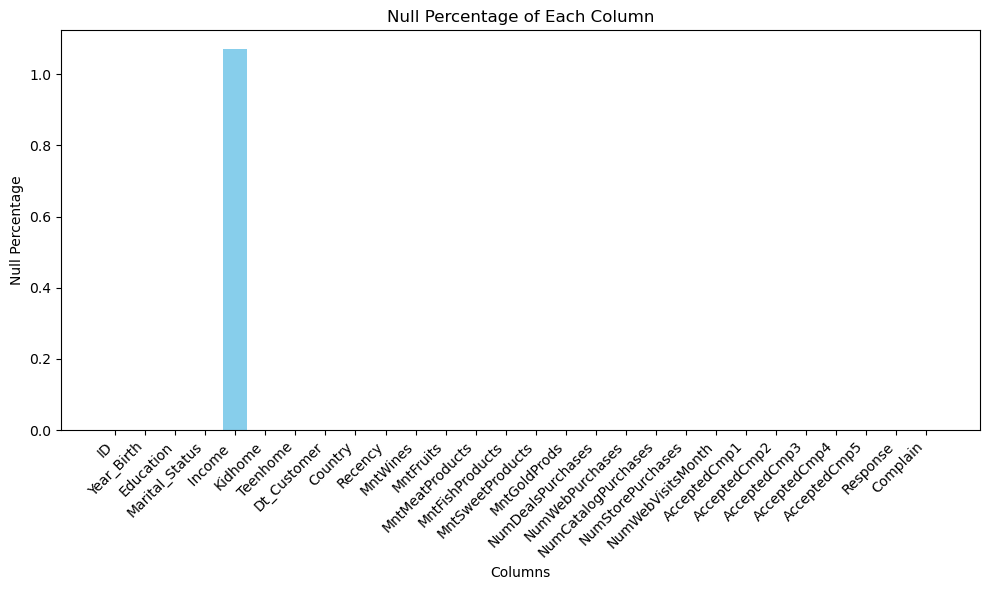

In [15]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(null_df['Column'], null_df['Null Percentage'], color='skyblue')
plt.title('Null Percentage of Each Column')
plt.xlabel('Columns')
plt.ylabel('Null Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

#### Insights:
1. Dataset exhibits strong data integrity with minimal missing values, ensuring reliability.
2. Slight incompleteness in Income column (1.07%), but overall data completeness is high.
3. Absence of missing values in key demographic and campaign-related attributes supports robust analysis.

#### Number of Zero Values

In [16]:
zero_count = (merged_df == 0).sum()
print("Count of Zero Values:-")
zero_count 

Count of Zero Values:-


ID                        1
Year_Birth                0
Education                 0
Marital_Status            0
 Income                   0
Kidhome                1293
Teenhome               1158
Dt_Customer               0
Country                   0
Recency                  28
MntWines                 13
MntFruits               400
MntMeatProducts           1
MntFishProducts         384
MntSweetProducts        419
MntGoldProds             61
NumDealsPurchases        46
NumWebPurchases          49
NumCatalogPurchases     586
NumStorePurchases        15
NumWebVisitsMonth        11
AcceptedCmp1           2096
AcceptedCmp2           2210
AcceptedCmp3           2077
AcceptedCmp4           2073
AcceptedCmp5           2077
Response               1906
Complain               2219
dtype: int64

#### Percentage of Zero Values

In [17]:
# Percentage of zero values
zero_percentage = ((merged_df.select_dtypes(include=np.number) == 0).mean() * 100).round(2)

In [18]:
#Turning into Dataframe
zero_df = pd.DataFrame({'Column': zero_percentage.index, 'Zero Percentage': zero_percentage.values})
print("Dataframe of Zero Value Percentage:-")
zero_df

Dataframe of Zero Value Percentage:-


,Column,Zero Percentage
0,ID,0.04
1,Year_Birth,0.00
2,Kidhome,57.72
3,Teenhome,51.70
4,Recency,1.25
5,MntWines,0.58
6,MntFruits,17.86
7,MntMeatProducts,0.04
8,MntFishProducts,17.14
9,MntSweetProducts,18.71


#### Visualizing Proportion of Zero Values in the Dataset

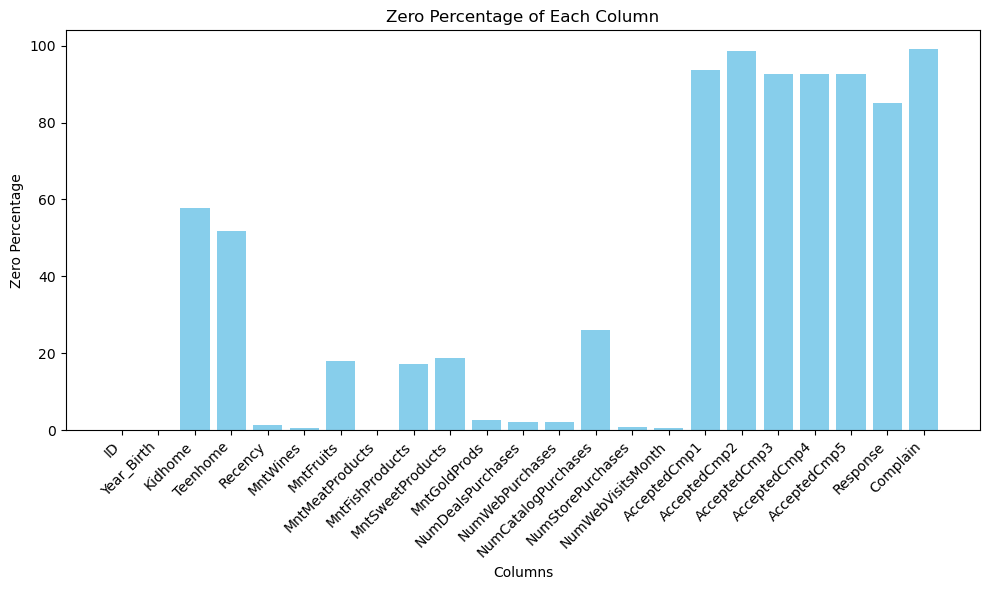

In [19]:
# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(zero_df['Column'], zero_df['Zero Percentage'], color='skyblue')
plt.title('Zero Percentage of Each Column')
plt.xlabel('Columns')
plt.ylabel('Zero Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

#### Insights:
1. Despite high numbers of zero values in campaign responses, ranging from 92.54% to 93.57%, indicating non-engagement, the campaigns still achieved considerable success in eliciting positive responses from engaged customers.

2. The Kidhome and Teenhome columns have high zero percentages, indicating that a significant portion of customers do not have children or teenagers living at home.

3. The Complain column has a very high zero percentage (99.06%), suggesting that the majority of customers did not file any complaints.

## Data Cleaning and Preprocessing

#### Converting Dt_Customer to datetime format

In [20]:
# Converting Dt_Customer column to date type
merged_df['Dt_Customer'] = pd.to_datetime(merged_df['Dt_Customer'])

#### Removing space from Income column name and Renaming it to 'Income_$'

In [21]:
# Renaming Income column to Income_$
merged_df = merged_df.rename(columns={' Income ': 'Income_$'})

#### Cleaning Income values and converting to Integer

In [22]:
# Cleaning Income column and imputing null values with zero assuming they don't have any income source
merged_df['Income_$'] =(merged_df['Income_$'].str.replace('[$,]', '', regex=True).str.strip().replace('', pd.NA).astype(float).fillna(0).astype(int))

Comment:- Income Column was filled with zero values where there were null values assuming that those customer have no income source available and might be a dependant one. 

#### Creating Age column

In [23]:
from datetime import datetime

# Convert 'Year_Birth' to datetime
merged_df['Year_Birth'] = pd.to_datetime(merged_df['Year_Birth'], format='%Y')

# Calculate age as of today
merged_df['Age'] = (datetime.now() - merged_df['Year_Birth']).astype('<m8[Y]')

#### Creating Enrollment Age column

In [24]:
# Calculate Enrollment age as of today
merged_df['Enrollment_age'] = (datetime.now() - merged_df['Dt_Customer']).astype('<m8[Y]')

#### Looking at Merged Data info after Data cleaning and preprocessing

In [25]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   datetime64[ns]
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income_$             2240 non-null   int32         
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Country              2240 non-null   object        
 9   Recency              2240 non-null   int64         
 10  MntWines             2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

#### Cleaned Merged_df

In [26]:
merged_df.head()

,ID,Year_Birth,Education,Marital_Status,Income_$,Kidhome,Teenhome,Dt_Customer,Country,Recency,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Age,Enrollment_age
0,1826,1970-01-01,Graduation,Divorced,84835,0,0,2014-06-16,SP,0,...,1,0,0,0,0,0,1,0,54.0,9.0
1,1,1961-01-01,Graduation,Single,57091,0,0,2014-06-15,CA,0,...,5,0,1,0,0,0,1,0,63.0,9.0
2,10476,1958-01-01,Graduation,Married,67267,0,1,2014-05-13,US,0,...,2,0,0,0,0,0,0,0,66.0,9.0
3,1386,1967-01-01,Graduation,Together,32474,1,1,2014-05-11,AUS,0,...,7,0,0,0,0,0,0,0,57.0,9.0
4,5371,1989-01-01,Graduation,Single,21474,1,0,2014-04-08,SP,0,...,7,0,0,1,0,0,1,0,35.0,9.0


### A. Univariates for continuous variables (mean, 25th, 50th, 75th, 90th and 95th percentile, min and max)

In [27]:
# Identify numeric columns
numeric_columns = merged_df.select_dtypes(include=np.number).columns

# Identify categorical columns (assuming they are of object type)
categorical_columns = merged_df.select_dtypes(include='object').columns

# Exclude 'year', 'id', and categorical columns
columns_of_interest = [col for col in numeric_columns if col not in ['Year_Birth', 'ID']] 

# Calculate univariate statistics for selected columns
univariate_stats = merged_df[columns_of_interest].describe(percentiles=[0.25, 0.5, 0.75, 0.90, 0.95])

# Add min and max to the DataFrame
univariate_stats.loc['min'] = merged_df[columns_of_interest].min()
univariate_stats.loc['max'] = merged_df[columns_of_interest].max()

# Display the univariate statistics
print("Statistics of Numerical Columns:-")
univariate_stats

Statistics of Numerical Columns:-


,Income_$,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Response,Complain,Age,Enrollment_age
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,51687.459375,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,5.316518,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,0.009375,55.194196,10.199554
std,25609.342730,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.426645,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.096391,11.984069,0.666897
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,9.000000
25%,34722.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,10.000000
50%,51075.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,10.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,11.000000
90%,79800.300000,1.000000,1.000000,89.000000,822.100000,83.000000,499.000000,120.000000,89.000000,122.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,72.000000,11.000000
95%,83927.000000,1.000000,1.000000,94.000000,1000.000000,123.000000,687.100000,168.050000,126.000000,165.050000,...,8.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,74.000000,11.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,11.000000


### B. Univariates for categorical variables

#### Unique Values in Categorical Column

In [28]:
print("Unique Values in Categorical Columns are:-\n")

# Finding unique values in each categorical column
for col in merged_df.select_dtypes(include=object).columns:
    unique_values = merged_df[col].unique()
    print(f"Column {col}: Unique values: {unique_values}")

Unique Values in Categorical Columns are:-

Column Education: Unique values: ['Graduation' 'PhD' '2n Cycle' 'Master' 'Basic']
Column Marital_Status: Unique values: ['Divorced' 'Single' 'Married' 'Together' 'Widow' 'YOLO' 'Alone' 'Absurd']
Column Country: Unique values: ['SP' 'CA' 'US' 'AUS' 'GER' 'IND' 'SA' 'ME']


#### Unique and Missing Value Counts in Categorical Column

In [29]:
# Calculate percentage of missing values and number of unique values for each categorical column
categorical_stats = pd.DataFrame(columns=['Missing%', 'Unique'])

for column in merged_df.select_dtypes(include='object').columns:
    missing_percentage = (merged_df[column].isna().sum() / len(merged_df)) * 100
    unique_values = merged_df[column].nunique()
    categorical_stats.loc[column] = [missing_percentage, unique_values]

# Display the categorical statistics
print("Statistics of Categorical Columns:-")
categorical_stats

Statistics of Categorical Columns:-


,Missing%,Unique
Education,0.0,5.0
Marital_Status,0.0,8.0
Country,0.0,8.0


### Que. 4 Extreme values of variables representing income, amount of money spent on various categories, recency of purchase <a class = "anchor" id="014"></a>

#### Outlier Values

**Outlier**:- An outlier is an observation or data point that significantly differs from other observations in a dataset. It can skew statistical analysis and lead to inaccurate conclusions. Outliers may result from measurement errors, natural variation, or genuine anomalies in the data. Identifying and handling outliers is essential for ensuring the robustness and reliability of statistical analyses and machine learning models.

In [45]:
import pandas as pd

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    return outliers

# List of columns to check for outliers
columns_to_check = ['Age','Enrollment_age','Income_$', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Initialize an empty list to store outlier DataFrames
outliers_dfs = []

# Identify outliers for each column and store in a list
for column in columns_to_check:
    outliers = detect_outliers_iqr(merged_df[column])
    outliers_df = pd.DataFrame({'Column': column, 'Outliers': outliers})
    outliers_dfs.append(outliers_df)

# Concatenate all outlier DataFrames into a single DataFrame
outliers_df = pd.concat(outliers_dfs, ignore_index=True)

# Display the DataFrame containing outliers
outliers_df

,Column,Outliers
0,Age,131.0
1,Age,125.0
2,Age,124.0
3,Income_$,157146.0
4,Income_$,160803.0
...,...,...
1121,MntGoldProds,191.0
1122,MntGoldProds,139.0
1123,MntGoldProds,187.0
1124,MntGoldProds,183.0


In [46]:
# Get the list of outlier values for the 'Income_$' feature
outliers_income = outliers_df[outliers_df['Column'] == 'Income_$']['Outliers'].tolist()

# Remove outliers from the main DataFrame for the 'Income_$' feature
clean_df = merged_df[~merged_df['Income_$'].isin(outliers_income)]

#### Let's Scale the values

**Scaling**:- Scaling refers to transforming numerical features to a similar scale, ensuring they have comparable magnitudes. This prevents features with larger scales from disproportionately influencing analysis or model training. Common techniques include normalization (scaling to a range between 0 and 1) and standardization (scaling to have a mean of 0 and standard deviation of 1).

In [32]:
from sklearn.preprocessing import StandardScaler

# Assuming 'merged_df' is your DataFrame containing the data
# List of columns to standardize
columns_to_standardize = ['Income_$','Enrollment_age','Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit and transform the selected columns
merged_df_scaled = merged_df.copy()  # Create a copy of the DataFrame to avoid modifying the original data
merged_df_scaled[columns_to_standardize] = scaler.fit_transform(merged_df_scaled[columns_to_standardize])

# Now, the data in the selected columns is standardized
# We can proceed to detect outliers using the IQR method on the standardized data

#### Plotting Box Plot

**Box Plot**:- A box plot, or box-and-whisker plot, visually represents the distribution of numerical data through quartiles. It displays the minimum, first quartile, median, third quartile, and maximum of a dataset. The box represents the interquartile range (IQR), encompassing the middle 50% of the data. Whiskers extend from the box to the minimum and maximum values, excluding outliers, which are shown as individual points beyond the whiskers.

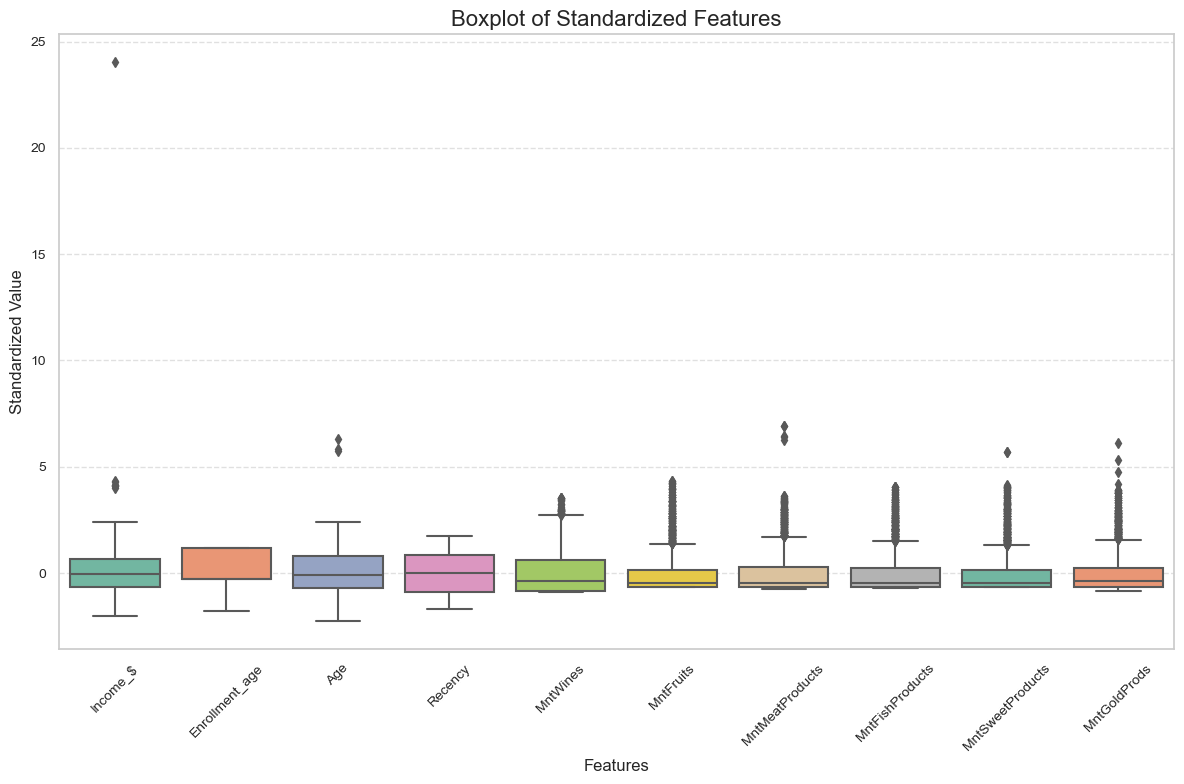

In [86]:
# Assuming 'merged_df_scaled' is your DataFrame containing the standardized data

# Plot boxplot
# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create a boxplot for standardized features
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df_scaled[columns_to_standardize], orient='v', palette='Set2')

# Set plot title and labels
plt.title('Boxplot of Standardized Features', fontsize=16)
plt.ylabel('Standardized Value', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45)

# Customize grid lines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Adjust font sizes and styles for better readability
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

# Show the plot
plt.show()

#### Insights:
1. Income and Age columns have a few outliers, indicating potential anomalies in income levels and Age among the dataset.
2. The MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, and MntGoldProds columns have a significant number of outliers, suggesting extreme spending behaviors in these product categories.
3. The Recency column has no outliers, indicating that most customers made recent purchases within the dataset without any unusual timing patterns.

#### Outliers Count

In [34]:
import pandas as pd

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers_count = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers_count

# List of columns to check for outliers
columns_to_check = ['Income_$','Enrollment_age', 'Age', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Initialize an empty list to store outlier DataFrames
outliers_dfs = []

# Calculate outliers count for each column and store in a list
for column in columns_to_check:
    outliers_count = detect_outliers_iqr(merged_df[column])
    outliers_df = pd.DataFrame({'Column': [column], 'Outliers Count': [outliers_count]})
    outliers_dfs.append(outliers_df)

# Concatenate all outlier DataFrames into a single DataFrame
outliers_count_df = pd.concat(outliers_dfs, ignore_index=True)

# Display the DataFrame containing outliers count
outliers_count_df

,Column,Outliers Count
0,Income_$,8
1,Enrollment_age,0
2,Age,3
3,Recency,0
4,MntWines,35
5,MntFruits,227
6,MntMeatProducts,175
7,MntFishProducts,223
8,MntSweetProducts,248
9,MntGoldProds,207


# Task 2

### Que. 5 Generate and check hypothesis around Amount Spent on different categories and response rate in different marketing campaigns. <a class = "anchor" id="021"></a>

In [35]:
# Step 1: Importing Necessary Libraries
from scipy.stats import ttest_ind

**T_Test**:- Hypothesis testing, such as the t-test, is a statistical method to assess if there's a significant difference between the means of two groups. It helps determine if sample means are statistically different, assuming the samples are drawn from populations with normal distributions.

In [87]:
# Step 2: Define a Function to Conduct T-tests
def conduct_ttests(data, categories, campaigns):
   
    results = {}
    for category in categories:
        for campaign in campaigns:
            # Select data for customers who accepted the offer in the campaign
            accepted = data[data[campaign] == 1][category]
            # Select data for customers who did not accept the offer in the campaign
            not_accepted = data[data[campaign] == 0][category]
            # Conduct independent sample t-test
            t_statistic, p_value = ttest_ind(accepted, not_accepted, equal_var=False)
            # Null Hypothesis (H0): There is no significant difference in the mean amount spent
            # on different categories between customers who responded positively and those who did not
            # Alternative Hypothesis (H1): There is a significant difference in the mean amount spent
            # on different categories between customers who responded positively and those who did not
            # Determine interpretation based on the p-value
            if p_value < 0.05:
                interpretation = "Reject Null Hypothesis (Significant Difference)"
            else:
                interpretation = "Fail to Reject Null Hypothesis (No Significant Difference)"
            # Store results in the dictionary
            results[(category, campaign)] = {'t_statistic': t_statistic, 'p_value': p_value, 'interpretation': interpretation}
    return results

#### Categories and Campaigns

In [37]:
# Step 3: Define the List of Categories and Campaigns
categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
campaigns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']

#### Conduct T-Test

In [38]:
# Step 4: Perform T-tests
# Call the function to conduct t-tests
ttest_results = conduct_ttests(merged_df, categories, campaigns)

#### Making DataFrame for all

In [39]:
# Convert the t-test results dictionary to a DataFrame
ttest_df = pd.DataFrame.from_dict(ttest_results, orient='index')

# Reset index to separate the category and campaign into individual columns
ttest_df.reset_index(inplace=True)
ttest_df.rename(columns={'level_0': 'Category', 'level_1': 'Campaign'}, inplace=True)

# Display the DataFrame
print("DataFrame of T-test Results:")
ttest_df

DataFrame of T-test Results:


,Category,Campaign,t_statistic,p_value,interpretation
0,MntWines,AcceptedCmp1,16.972571,1.106984e-37,Reject Null Hypothesis (Significant Difference)
1,MntWines,AcceptedCmp2,7.039273,8.952398e-08,Reject Null Hypothesis (Significant Difference)
2,MntWines,AcceptedCmp3,2.526692,1.237514e-02,Reject Null Hypothesis (Significant Difference)
3,MntWines,AcceptedCmp4,15.849941,3.180321e-36,Reject Null Hypothesis (Significant Difference)
4,MntWines,AcceptedCmp5,22.829574,2.308869e-55,Reject Null Hypothesis (Significant Difference)
5,MntWines,Response,9.574842,1.149555e-19,Reject Null Hypothesis (Significant Difference)
6,MntFruits,AcceptedCmp1,6.740147,3.072716e-10,Reject Null Hypothesis (Significant Difference)
7,MntFruits,AcceptedCmp2,-0.593962,5.569415e-01,Fail to Reject Null Hypothesis (No Significant...
8,MntFruits,AcceptedCmp3,0.652165,5.151064e-01,Fail to Reject Null Hypothesis (No Significant...
9,MntFruits,AcceptedCmp4,0.494386,6.215883e-01,Fail to Reject Null Hypothesis (No Significant...


### Que. 6 Create a funnel analysis showing what percentage of unique customers accept campaign 1,2, 3,..etc <a class = "anchor" id="022"></a>

#### Various stages of campaign

In [40]:
stages = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4','AcceptedCmp5','Response']

#### Counting unique customers for each campaign

In [41]:
# Initialize list to store counts of unique customers
unique_customers_count = []

# Iterate through each stage and calculate the count of unique customers
previous_accepted = set()  # Set to keep track of customers who accepted in previous stages
for stage in stages:
    # Construct the filter condition for the current stage
    filter_condition = merged_df[stage] == 1
    for prev_stage in stages[:stages.index(stage)]:
        filter_condition &= ~(merged_df[prev_stage] == 1)
    
    # Count unique customers who accepted in the current stage but not in any previous stages
    current_accepted = set(merged_df[filter_condition]['ID'])
    unique_customers_count.append(len(current_accepted))
    
    # Update the set of customers who accepted in previous stages
    previous_accepted |= current_accepted
    
print(unique_customers_count)

[144, 17, 135, 108, 59, 146]


#### Look at the Dataframe

In [42]:
count_df=pd.DataFrame({'Stage':stages,'Count':unique_customers_count})
count_df

,Stage,Count
0,AcceptedCmp1,144
1,AcceptedCmp2,17
2,AcceptedCmp3,135
3,AcceptedCmp4,108
4,AcceptedCmp5,59
5,Response,146


#### Funnel Analysis of Campaigns

**Funnel Chart**:- A funnel chart is a type of visualization used to represent the progressive reduction of data as it passes through different stages of a process. It resembles a funnel shape, with the widest part at the top representing the initial stage and subsequent narrowing sections representing the successive stages. Funnel charts are commonly used to track conversion rates or customer journeys, illustrating how many individuals move from one stage to the next.

In [89]:
total_customers= merged_df.shape[0]

# Calculate the percentage of people who accepted the campaign
percentage_accepted = [(count / total_customers) * 100 for count in unique_customers_count]

# Create a Funnel plot with percentage information
fig = go.Figure(go.Funnel(
    y=stages,
    x=unique_customers_count,
    textinfo="value+percent previous",
    text=[f"{val} ({perc:.2f}%)" for val, perc in zip(unique_customers_count, percentage_accepted)]
))

# Add a title to the Funnel plot
fig.update_layout(title_text=f"Funnel Analysis of Campaigns",title_x=0.5)

# Display the Funnel plot
fig.show()

#### Insights:
1. Campaigns 1,3 and Response have relatively higher counts compared to the other campaigns, indicating stronger customer engagement with these campaigns.
2. Campaigns 2, 4 and Campaigns 5 have lower counts, suggesting lower levels of customer response or acceptance to these particular campaigns.
3. Response has the highest count among all stages, indicating a significant number of customers responded positively to the final campaign.

### Que. 7 Find out how income impacts the amount spent on - Wine - Meat Products - Gold Products - Fish Products <a class = "anchor" id="023"></a>

#### Let's remove outlier values from Income column for better analysis

In [47]:
# Get the list of outlier values for the 'Income_$' feature
outliers_income = outliers_df[outliers_df['Column'] == 'Income_$']['Outliers'].tolist()

# Remove outliers from the main DataFrame for the 'Income_$' feature
clean_df = merged_df[~merged_df['Income_$'].isin(outliers_income)]

#### Grouping the data by income bins

In [48]:
# Step 1: Create Income Bins
income_bins = pd.cut(clean_df['Income_$'], bins=16)  # Divide income into 16 bins

# Step 2: Group Data by Income Bins
income_groups = clean_df.groupby(income_bins)

# Step 3: Calculate Mean Spending on Product Categories for Each Income Bin
mean_spending = income_groups[['MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntFishProducts']].mean()

### Let's Visualize using Bar chart

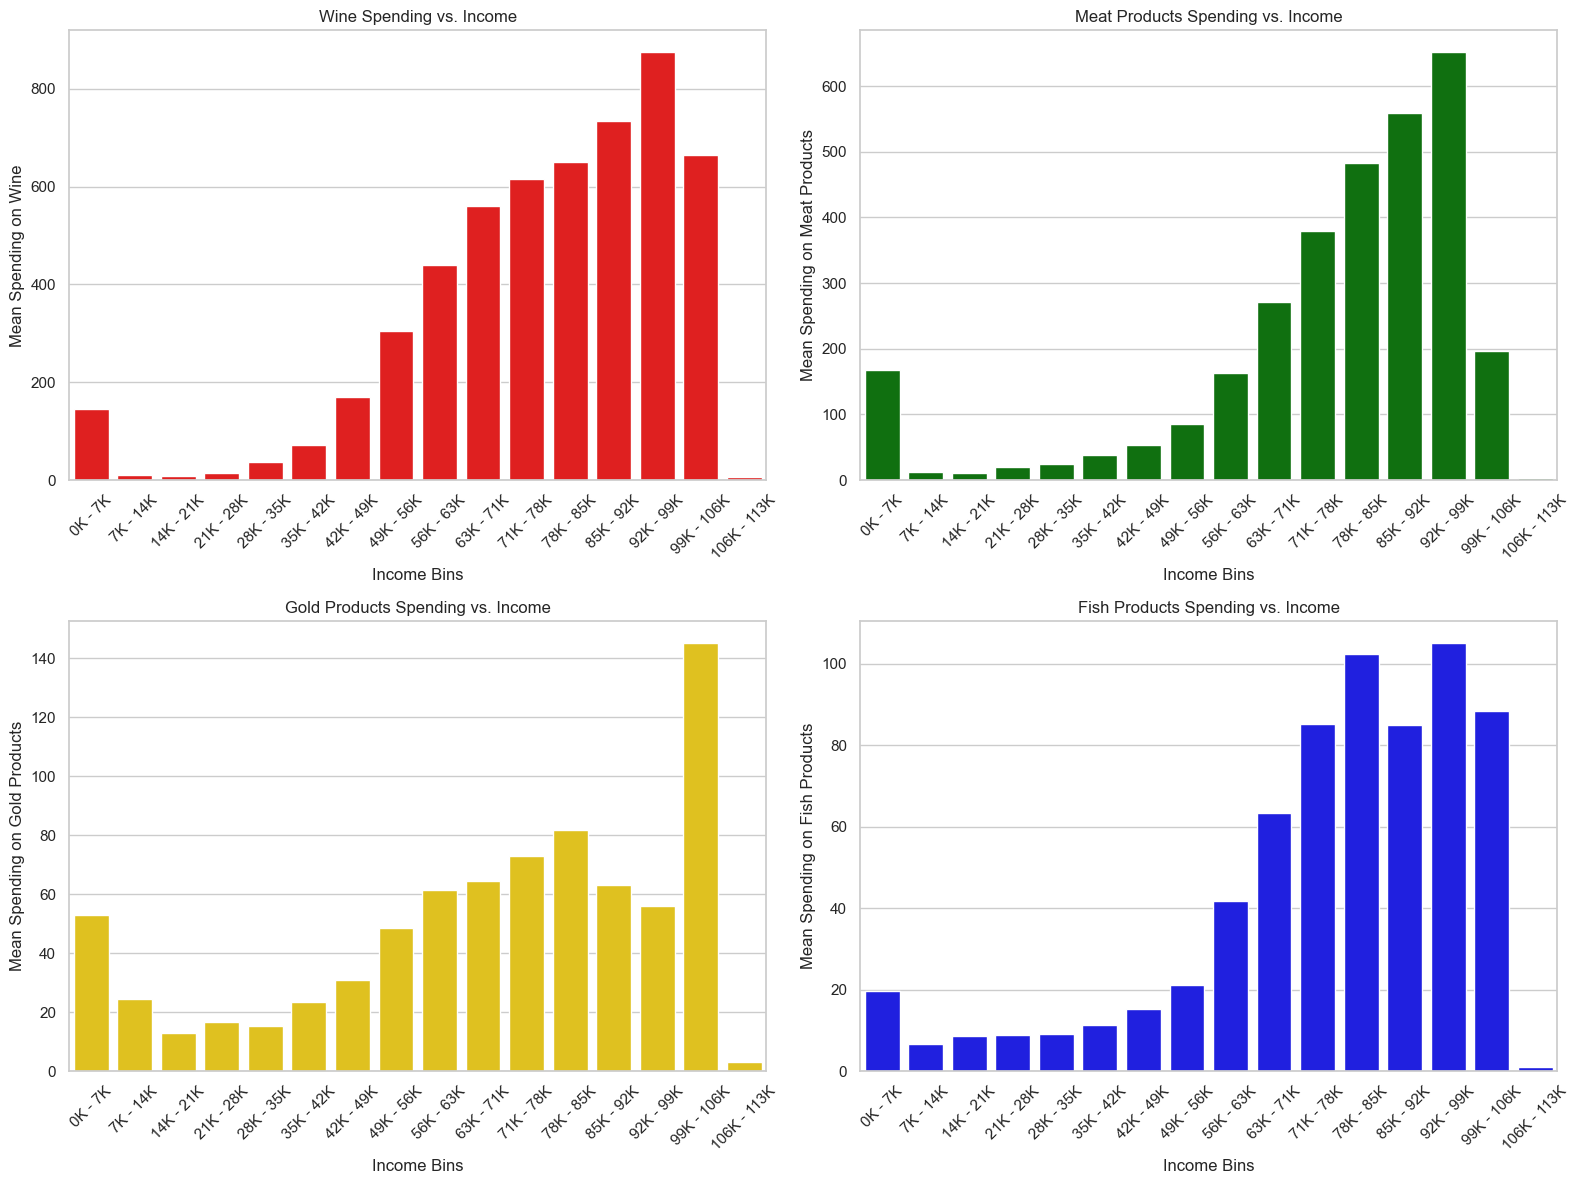

In [70]:
# Convert income bins to readable format (e.g., 33333 to 33.3K)
income_labels = [f'{int(income.left / 1000)}K - {int(income.right / 1000)}K' for income in mean_spending.index]

# Set Seaborn style
sns.set_theme(style="whitegrid")

# Create subplots for each spending category
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Wine Spending vs. Income
sns.barplot(x=income_labels, y=mean_spending['MntWines'], color='red', ax=axs[0, 0])
axs[0, 0].set_title('Wine Spending vs. Income')
axs[0, 0].set_xlabel('Income Bins')
axs[0, 0].set_ylabel('Mean Spending on Wine')
axs[0, 0].tick_params(axis='x', rotation=45)

# Meat Products Spending vs. Income
sns.barplot(x=income_labels, y=mean_spending['MntMeatProducts'], color='green', ax=axs[0, 1])
axs[0, 1].set_title('Meat Products Spending vs. Income')
axs[0, 1].set_xlabel('Income Bins')
axs[0, 1].set_ylabel('Mean Spending on Meat Products')
axs[0, 1].tick_params(axis='x', rotation=45)

# Gold Products Spending vs. Income
sns.barplot(x=income_labels, y=mean_spending['MntGoldProds'], color='gold', ax=axs[1, 0])
axs[1, 0].set_title('Gold Products Spending vs. Income')
axs[1, 0].set_xlabel('Income Bins')
axs[1, 0].set_ylabel('Mean Spending on Gold Products')
axs[1, 0].tick_params(axis='x', rotation=45)

# Fish Products Spending vs. Income
sns.barplot(x=income_labels, y=mean_spending['MntFishProducts'], color='blue', ax=axs[1, 1])
axs[1, 1].set_title('Fish Products Spending vs. Income')
axs[1, 1].set_xlabel('Income Bins')
axs[1, 1].set_ylabel('Mean Spending on Fish Products')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Insights:
1. **Positive Correlation Between Income and Spending:** Generally, as income increases, customers tend to spend more on wines, meat products, and gold products. This trend is evident from the increasing expenditure observed in higher income brackets.
   
2. **Unique Spending Behavior for Gold Products:** While spending on most items increases with income, the relationship is more nuanced for gold products. There's a peak in spending around the middle-income range, followed by a slight decrease in higher income brackets. This suggests that while gold products are desirable across income groups, they may be perceived differently or serve varying purposes based on income levels.

3. **Varied Spending Patterns for Fish Products:** Unlike other items, spending on fish products shows less consistent patterns across income groups. While there's a general increase in spending with income, fluctuations and inconsistencies are observed, indicating that factors other than income may influence spending behavior for fish products.

### Que. 8 Can you test the hypothesis that recent customers complain less in general compared to older customers? <a class = "anchor" id="024"></a>

**Explainantion**:-
We are using the chi-square test for independence to examine the relationship between two categorical variables: customer recency and customer complaints. The chi-square test will help us determine if there is a significant association between these two variables. In this case, we want to investigate whether recent customers tend to complain less compared to older customers. By conducting a chi-square test, we can assess whether there is evidence to reject the null hypothesis, which states that there is no association between recency and complaints. If the test results in a low p-value, we can conclude that there is a significant difference in complaint rates between recent and older customers, providing valuable insights into customer behavior.

In [50]:
from scipy.stats import chi2_contingency

# Define recent and older customer groups based on recency
recent_customers = merged_df[merged_df['Recency'] <= 50]  # Customers who made a purchase in last 50 days
older_customers = merged_df[merged_df['Recency'] > 50]   # Customers who made a purchase more than 50 days ago

#### Old vs New Customer Complain Mean

In [51]:
# Calculate complaint rates for each group
recent_complaint_rate = recent_customers['Complain'].mean()
older_complaint_rate = older_customers['Complain'].mean()

**Chi-Square Test for Independence:**
A statistical test used to determine whether there is a significant association between two categorical variables. It assesses whether the observed frequency distribution of the variables differs from the expected distribution, assuming they are independent.

In [52]:
# Perform chi-square test of independence
observed = pd.crosstab(merged_df['Recency'] <= 50, merged_df['Complain'])
chi2, p_val, _, _ = chi2_contingency(observed)

# Print results
print(f"Complaint Rate for Recent Customers: {recent_complaint_rate:.2f}")
print(f"Complaint Rate for Older Customers: {older_complaint_rate:.2f}")
print(f"Chi-square Statistic: {chi2:.2f}")
print(f"P-value: {p_val:.4f}")

# Interpret results
if p_val < 0.05:
    print("There is a significant association between recency and complaint status.")
else:
    print("There is no significant association between recency and complaint status.")

Complaint Rate for Recent Customers: 0.01
Complaint Rate for Older Customers: 0.01
Chi-square Statistic: 0.00
P-value: 1.0000
There is no significant association between recency and complaint status.


### Que 9. Do people who accept the offer in the first campaign also accept in any other campaign? <a class = "anchor" id="025"></a>

#### Campaign Acceptance details

In [53]:
# Filter the dataset to include only individuals who accepted the offer in the first campaign
accepted_first_campaign = merged_df[merged_df['AcceptedCmp1'] == 1]

# Calculate the proportion of individuals who accepted each subsequent campaign among those who accepted the first campaign
subsequent_campaigns = ['AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']
proportions = {}
for campaign in subsequent_campaigns:
    proportion_accepted = accepted_first_campaign[campaign].mean()
    proportions[campaign] = proportion_accepted

# Print the proportions
print("Proportions of acceptance in subsequent campaigns among those who accepted the first campaign:")
for campaign, proportion in proportions.items():
    print(f"{campaign}: {proportion:.2f}")

Proportions of acceptance in subsequent campaigns among those who accepted the first campaign:
AcceptedCmp2: 0.09
AcceptedCmp3: 0.17
AcceptedCmp4: 0.33
AcceptedCmp5: 0.47
Response: 0.55


#### Visualizing the Campaign acceptance info

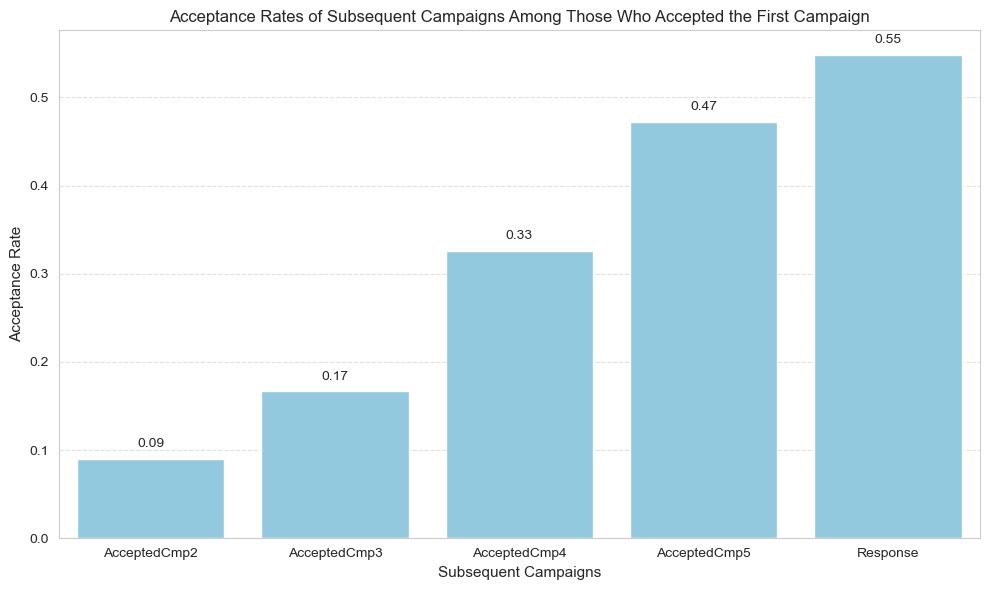

In [54]:
# Convert proportions dictionary to a pandas Series for easier plotting
proportions_series = pd.Series(proportions)

# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar plot with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=proportions_series.index, y=proportions_series, color='skyblue')

# Set plot title and labels
plt.title('Acceptance Rates of Subsequent Campaigns Among Those Who Accepted the First Campaign', fontsize=12)
plt.xlabel('Subsequent Campaigns', fontsize=11)
plt.ylabel('Acceptance Rate', fontsize=11)

# Add grid lines for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Add data labels to the bars
for i, v in enumerate(proportions_series):
    plt.text(i, v + 0.01, f'{v:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

#### Insights:
1. **Increasing Acceptance Rates Across Campaigns:** There is a notable trend of increasing acceptance rates in subsequent campaigns among those who accepted the first campaign. The proportion of acceptance steadily rises from AcceptedCmp2 to Response, indicating a positive response escalation over multiple campaigns.

2. **Significant Jump in Response Rate:** The most significant jump in acceptance rate occurs between AcceptedCmp4 and AcceptedCmp5, with the proportion increasing from 0.33 to 0.47. This suggests that the fourth and fifth campaigns may have been particularly effective in engaging customers who responded positively to the initial campaign.

3. **High Response Rate for Final Campaign:** The Response campaign exhibits the highest acceptance rate at 0.55, indicating that a significant portion of customers who responded to the first campaign continued to engage with subsequent campaigns, ultimately resulting in a favorable response to the final campaign.

### Que 10. Profile of people who respond vs. who don’t. <a class = "anchor" id="026"></a>

#### Let's remove outlier values from Income and Year_Birth columns for better analysis

In [55]:
# Get the list of outlier values for the 'Age' and 'Income_$' features
outliers_age_income = outliers_df[outliers_df['Column'].isin(['Age', 'Income_$'])]['Outliers']

# Remove outliers from the main DataFrame for the 'Year_Birth' and 'Income_$' features
new_clean_df = merged_df[~merged_df.isin(outliers_age_income.values).any(axis=1)]

#### Splitting dataset into Responders vs Non-Responders and Look at Stats

In [56]:
# Split the dataset into responders and non-responders
responders = new_clean_df[new_clean_df['Response'] == 1]
non_responders = new_clean_df[new_clean_df['Response'] == 0]

# Explore demographic characteristics
demographic_columns = ['Age', 'Education', 'Marital_Status', 'Income_$', 'Kidhome', 'Teenhome', 'Country']

# Compare distributions of demographic variables between responders and non-responders
for column in demographic_columns:
    print(f"Demographic Variable: {column}")
    print("Responders:")
    print(responders[column].describe())
    print("Non-Responders:")
    print(non_responders[column].describe())
    print("\n")

Demographic Variable: Age
Responders:
count    321.000000
mean      54.971963
std       12.353485
min       28.000000
25%       46.000000
50%       54.000000
75%       65.000000
max       81.000000
Name: Age, dtype: float64
Non-Responders:
count    1856.000000
mean       55.133082
std        11.585429
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max        84.000000
Name: Age, dtype: float64


Demographic Variable: Education
Responders:
count            321
unique             5
top       Graduation
freq             143
Name: Education, dtype: object
Non-Responders:
count           1856
unique             5
top       Graduation
freq             951
Name: Education, dtype: object


Demographic Variable: Marital_Status
Responders:
count        321
unique         7
top       Single
freq         101
Name: Marital_Status, dtype: object
Non-Responders:
count        1856
unique          8
top       Married
freq          753
Name: Marital_Status, dtype: ob

#### Defining Charts for each group i.e. Numerical and Categorical

**Histogram**:- A histogram is a visual representation of data distribution, displaying the frequency of values within predefined intervals or bins. It provides insights into the spread and shape of the data. In Python, histograms are commonly created using libraries like Matplotlib, where the `hist()` function is used to plot the data. Histograms are essential for analyzing and understanding the distribution of numerical data.

**Column Chart**:- A column chart in Python is a visual representation of data using vertical bars, where the height of each bar corresponds to the data being represented. It is a common way to compare categories or show trends in data. In Python, column charts can be created using libraries like Matplotlib or Seaborn, providing a clear and effective way to visualize and analyze data.

In [92]:
def plot_histogram(data, variable, group, ax):
    # Creating a histogram plot with KDE
    sns.histplot(data=data, x=variable, bins=20, color='skyblue', alpha=0.7, kde=True, ax=ax)
    # Plot title and labels
    ax.set_title(f'Distribution of {variable} ({group})', fontsize=12)
    ax.set_xlabel(variable, fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    # Grid lines for better visualization
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def plot_barplot(data, variable, group, ax):
    # Creating a bar plot
    sns.barplot(x=data[variable].value_counts(normalize=True).index, y=data[variable].value_counts(normalize=True), color='skyblue', alpha=0.7, ax=ax)
    # Plot title and labels
    ax.set_title(f'Distribution of {variable} ({group})', fontsize=14)
    ax.set_xlabel(variable, fontsize=12)
    ax.set_ylabel('Proportion', fontsize=12)
    # Rotate x-axis labels for better readability
    ax.set_xticklabels(ax.get_xticklabels(), horizontalalignment='center')
    # Grid lines for better visualization
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    # Annotations to the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

#### Plotting the charts

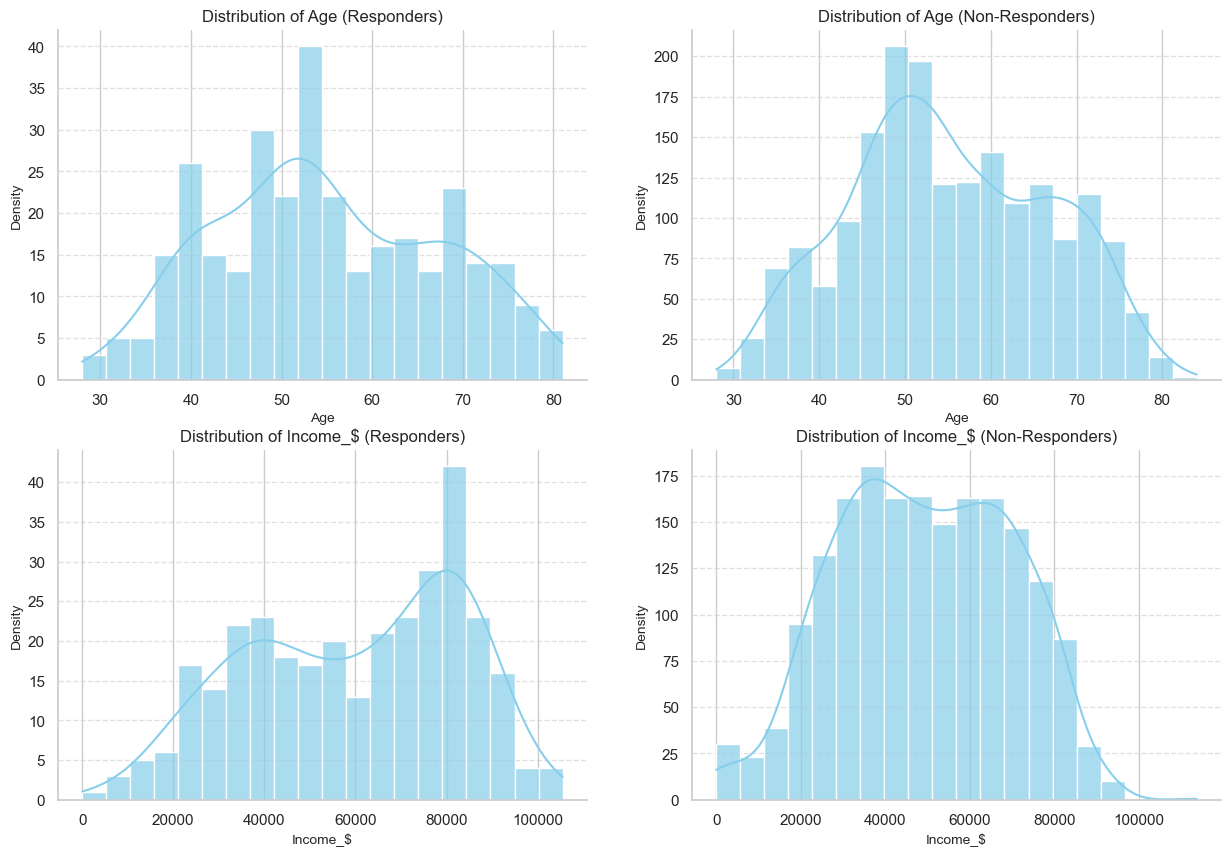

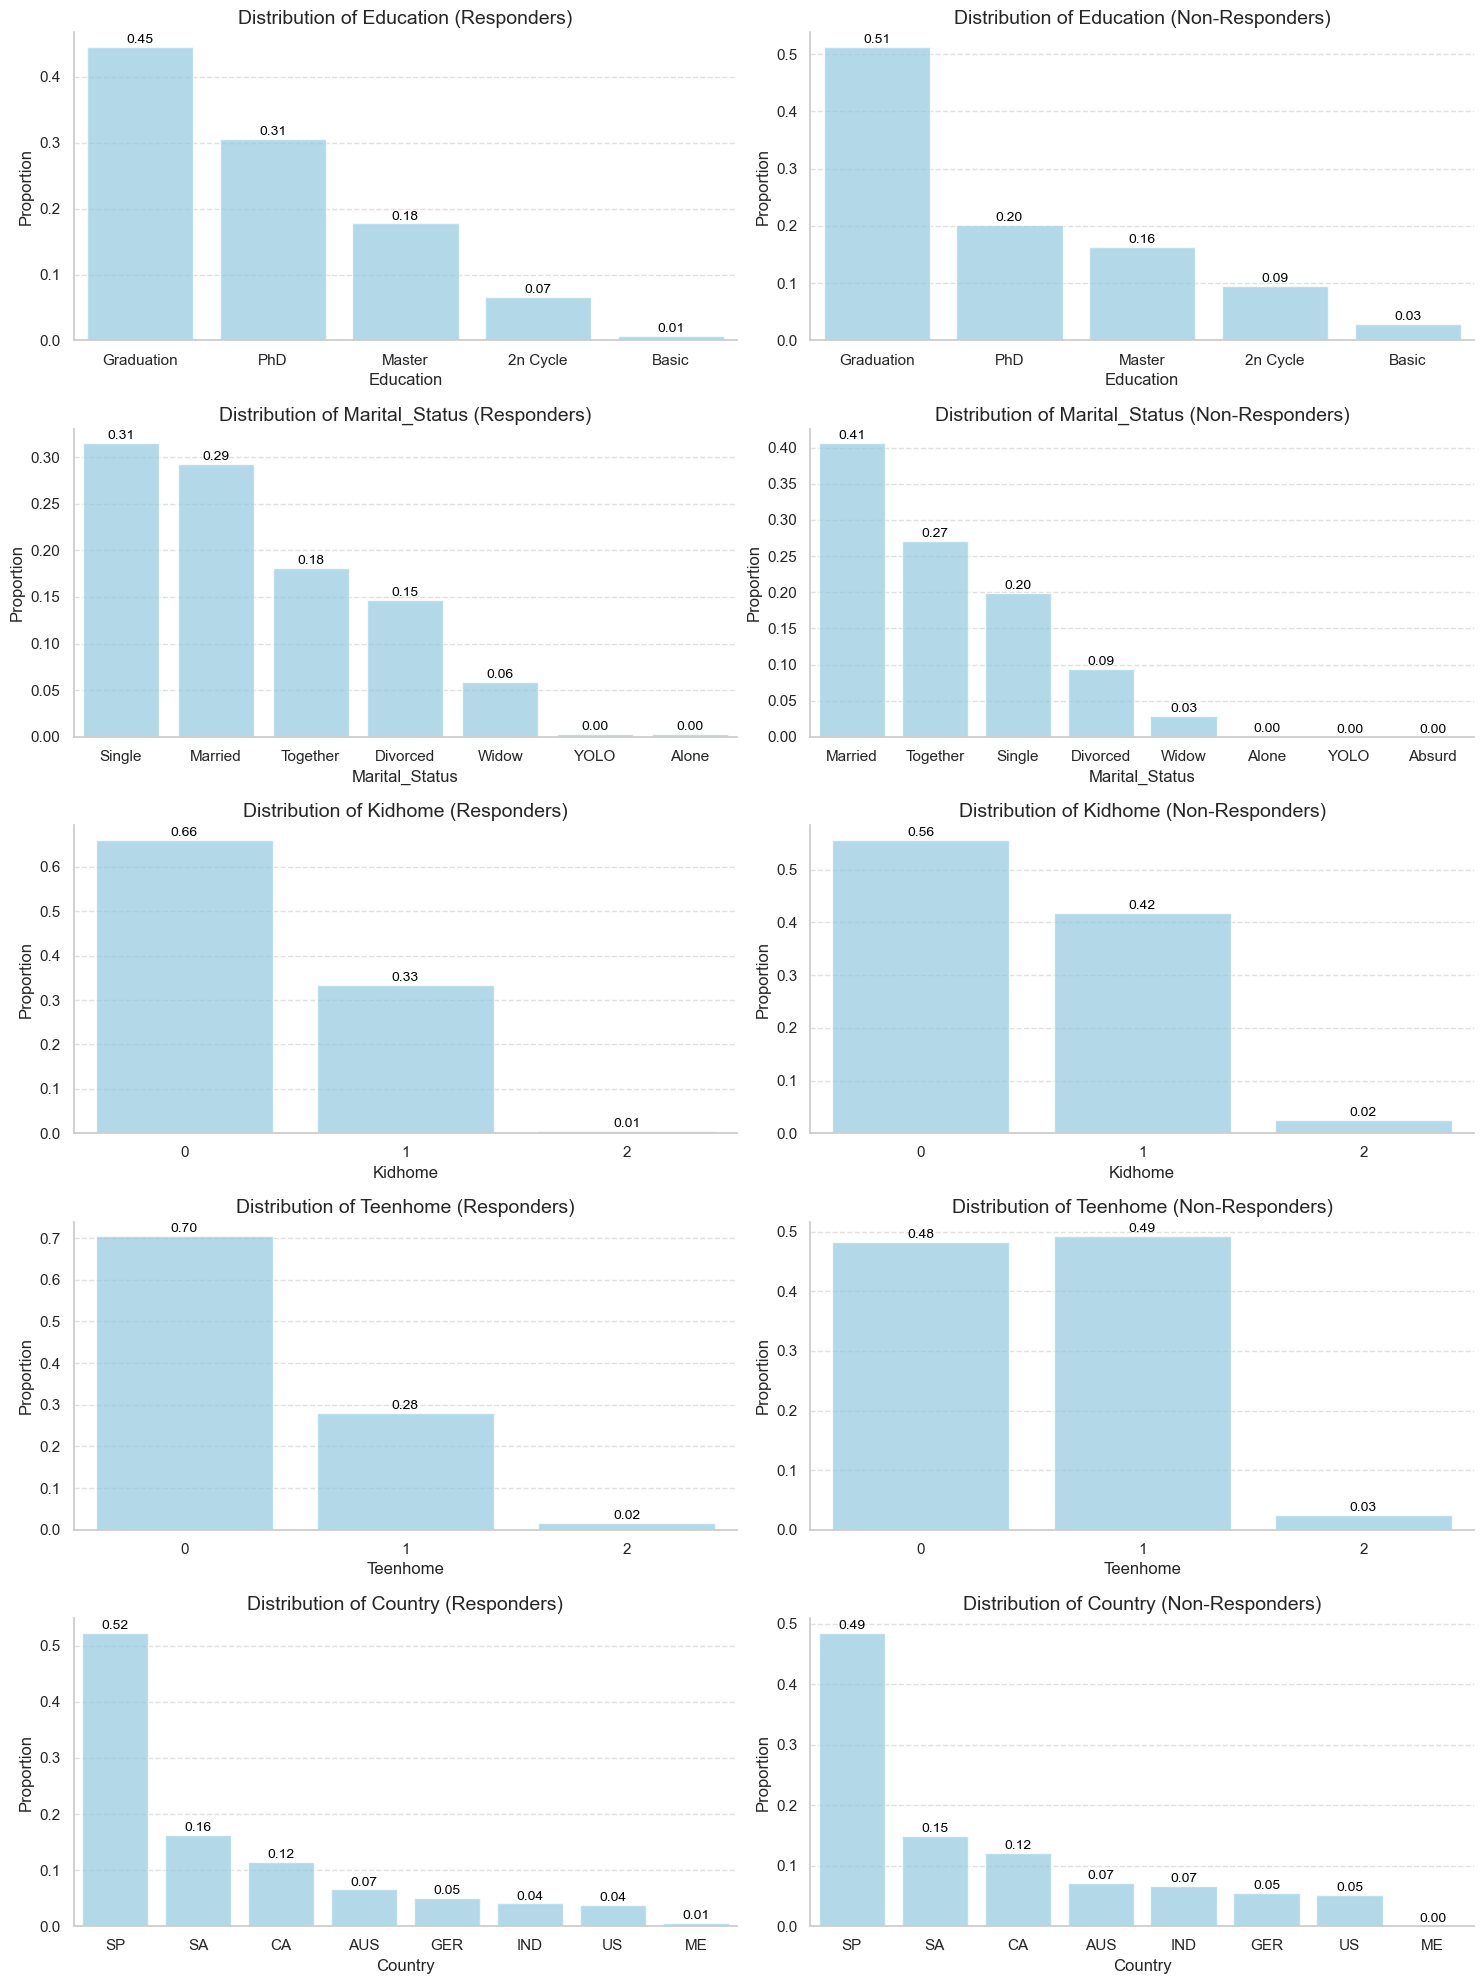

In [93]:
# Numerical variables
numerical_variables = ['Age', 'Income_$']
fig, axes = plt.subplots(len(numerical_variables), 2, figsize=(15, 10))  # Create subplots grid

for i, var in enumerate(numerical_variables):
    plot_histogram(responders, var, 'Responders', axes[i, 0])
    plot_histogram(non_responders, var, 'Non-Responders', axes[i, 1])

# Categorical variables
categorical_variables = ['Education', 'Marital_Status','Kidhome', 'Teenhome', 'Country']
fig, axes = plt.subplots(len(categorical_variables), 2, figsize=(15, 20))  # Create subplots grid

for i, var in enumerate(categorical_variables):
    plot_barplot(responders, var, 'Responders', axes[i, 0])
    plot_barplot(non_responders, var, 'Non-Responders', axes[i, 1])

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

### Demographic Insights:

#### Year of Birth:
- **Responders:** 
  - The majority of responders were born between 1970 and 1985, peaking around the early 1970s to mid-1980s. The mean birth year is approximately 1969, indicating that the bulk of responders are in their mid-30s to early 50s.
- **Non-Responders:** 
  - Non-responders, on the other hand, have a similar distribution, with the highest concentration between 1972 and 1979 i.e. mid 40s to 50s. The mean age is around 55, suggesting that non-responders are slightly older on average compared to responders.

#### Education:
- **Responders:** 
  - Among responders, Graduation is the most prevalent education level, with nearly half of the responders having this qualification. This is followed by Phd, Master, and 2n Cycle, indicating a relatively high level of education among this group.
- **Non-Responders:** 
  - Non-responders exhibit a similar educational distribution, with Graduation being the most common education level, followed by Phd, Master, and 2n Cycle.

#### Marital Status:
- **Responders:** 
  - The majority of responders are Single, comprising around one-third of the group. This is followed by Married, which accounts for a significant portion of responders.
- **Non-Responders:** 
  - In contrast, non-responders are more likely to be Married, with over one-third of the group falling into this category. Single individuals also make up a substantial portion of non-responders.

#### Income:
- **Responders:** 
  - Responders have a higher mean income (60,029.41) compared to non-responders (49,486.49). Most responders fall within the income bracket of 40,000 to 80,000, with fluctuations and the highest concentration between 78,000 and 82,000.
- **Non-Responders:** 
  - Non-responders are generally in a lower income bracket, with most falling within the range of 30,000 to 78,000. Unlike responders, there are no significant fluctuations in income distribution among non-responders.

#### Household Composition:
- **Responders:** 
  - The majority of responders have no children at home (Kidhome = 0), followed by one child (Kidhome = 1), and two children (Kidhome = 2). This suggests that a significant portion of responders may be younger adults or individuals without children.
- **Non-Responders:** 
  - Non-responders exhibit a similar household composition, with most having no children at home, followed by one child, and two children. 

#### Teenagers at Home:
- **Responders:** 
  - Most responders have no teenagers at home (Teenhome = 0), followed by one teenager (Teenhome = 1), and two teenagers (Teenhome = 2). This indicates that the majority of responders may not have teenage children.
- **Non-Responders:** 
  - In contrast, non-responders are more likely to have one teenager at home, followed by no teenagers, and two teenagers. This suggests that non-responders may have a higher likelihood of having teenage children.

#### Country:
- **Responders:** 
  - The highest number of responders are from Spain (SP), followed by SA, CA, AUS, and GER. This distribution reflects the geographic distribution of responders, with Spain being the most prevalent country.
- **Non-Responders:** 
  - Similarly, the highest number of non-responders are from Spain (SP), followed by SA, CA, AUS, and IND. The distribution among non-responders mirrors that of responders, indicating a consistent geographic representation.

# Task 3

### Plot the Heatmap to find Correlations

**Correlation**:- Correlation is a statistical metric that quantifies the degree to which two variables are related. It ranges from -1 to 1, where:
-   1 indicates a perfect positive correlation,
- -1 indicates a perfect negative correlation, and
-   0 indicates no correlation.

**Heatmap**:- A heatmap in Python is a visual representation of data where values in a matrix are represented using colors. It provides a clear and intuitive way to display complex data patterns and relationships. Heatmaps are commonly created using libraries like Plotly, Seaborn, or Matplotlib, enabling effective visualization and analysis of data in various fields such as data science, machine learning, and statistics.

C:\Users\BIGWIG DIGITALS\AppData\Local\Temp\ipykernel_5740\3139031879.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



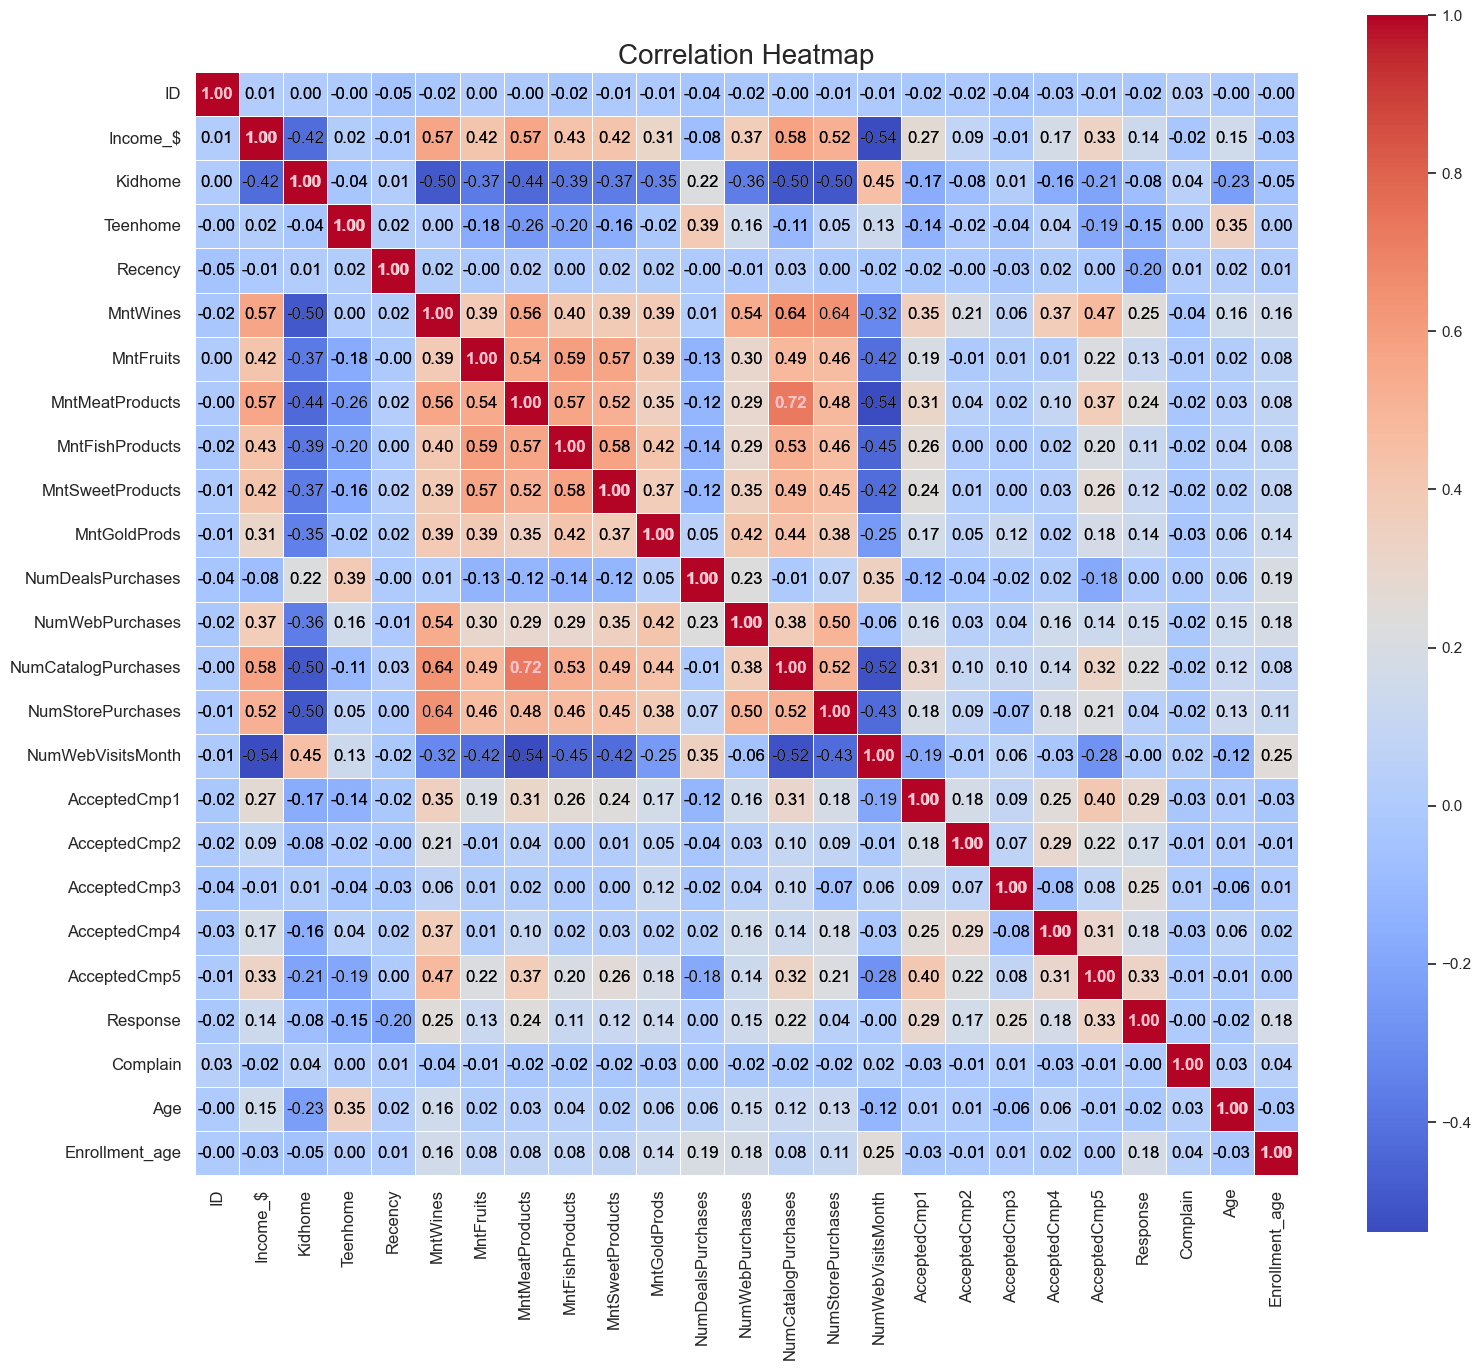

In [59]:
# Calculate correlation matrix
corr_matrix = merged_df.corr()

# Setting theme
sns.set_theme(style="whitegrid")

# Creating heatmap
plt.figure(figsize=(16, 14))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True, annot_kws={"size": 12})

# Title and adjust font size
plt.title('Correlation Heatmap', fontsize=20)

# Font sizes for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Highlight specific values
for i in range(corr_matrix.shape[0]):
    for j in range(corr_matrix.shape[1]):
        if corr_matrix.iloc[i, j] > 0.7:  # Highlight values above a certain threshold
            text = plt.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='pink', fontsize=12, fontweight='bold')
        else:
            text = plt.text(j + 0.5, i + 0.5, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize=12)

plt.tight_layout()
plt.show()

### Insights from Correlation Analysis with Response

- **Age (0.02):** There is a minimal positive correlation between the birth year and response.
- **Income (0.14):** A positive correlation suggests higher income levels may influence response likelihood.
- **Kidhome (-0.08) & Teenhome (-0.15):** Negative correlations indicate fewer children at home may slightly increase response rates.
- **Recency (-0.20):** A negative correlation implies recent interactions may impact response positively.
- **MntWines (0.25), MntMeatProducts (0.24):** Higher spending on wines and meat products shows a stronger positive correlation with response.
- **MntFruits (0.13), MntFishProducts (0.11), MntSweetProducts (0.12), MntGoldProds (0.14):** Moderate positive correlations suggest preferences for these product categories may influence response.
- **NumWebPurchases (0.15), NumCatalogPurchases (0.22):** Positive correlations indicate higher purchase activity, especially online and through catalogs, may lead to increased response rates.
- **AcceptedCmp1 (0.29), AcceptedCmp3 (0.25), AcceptedCmp5 (0.33):** Strong positive correlations with specific marketing campaigns suggest their effectiveness in driving responses.

### Finding out Important Features as per Correlation targetting 'Response'

In [60]:
# Identify important features based on correlation with the target variable 'Response'
target_corr = corr_matrix['Response'].sort_values(ascending=False)
important_features = target_corr[abs(target_corr) > 0.1].index.tolist()  # Adjust threshold as needed
print("Important features based on correlation with 'Response':", important_features)

Important features based on correlation with 'Response': ['Response', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp3', 'MntWines', 'MntMeatProducts', 'NumCatalogPurchases', 'Enrollment_age', 'AcceptedCmp4', 'AcceptedCmp2', 'NumWebPurchases', 'MntGoldProds', 'Income_$', 'MntFruits', 'MntSweetProducts', 'MntFishProducts', 'Teenhome', 'Recency']


### Converting Categorical Columns into desired format for applying ML Algorithm

**One Hot Encoding**:- One-hot encoding is a technique used in machine learning to convert categorical variables into binary vectors. It involves representing categorical values as binary vectors, where each category is mapped to an integer and then to a binary vector where only one bit is set to 1 (hot) while the rest are 0s. This method is crucial for converting categorical data into a numerical format that machine learning algorithms can process effectively. In Python, one-hot encoding can be implemented using libraries like Pandas or scikit-learn, providing a way to handle categorical data in machine learning models.

In [61]:
# Perform one-hot encoding for categorical variables
merged_df_encoded = pd.get_dummies(merged_df, columns=['Education', 'Marital_Status', 'Country'], drop_first=True)

# Remove the original categorical columns
merged_df_encoded.drop(['Dt_Customer','ID','Year_Birth'], axis=1, inplace=True)  # Assuming 'Dt_Customer' is not needed for modeling

# Check the shape of the encoded dataframe
print("Shape of encoded dataframe:", merged_df_encoded.shape)

Shape of encoded dataframe: (2240, 42)


### Separating Independent and Dependent (Target) Variables and Scaling it to same dimension

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = merged_df_encoded.drop(['Response'], axis=1)
y = merged_df_encoded['Response']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Finding n_components using eigen values for Principal Component Analysis (PCA)

**Covariance matrix**:- It is a square matrix that displays the covariances between multiple variables, providing insights into how different variables are related in a dataset. It shows both the variances of individual variables and the covariances between pairs of variables. In Python, a covariance matrix can be created using functions like numpy.cov(), allowing for a comprehensive understanding of the relationships within a dataset.

**Eigen Values**:- Eigen values are scalar values that represent the scaling factor of eigen vectors when a linear transformation is applied to them. In Python, eigen values can be calculated using functions like numpy.linalg.eigvals() or numpy.linalg.eig(). They play a crucial role in various mathematical and computational applications, providing insights into the behavior of linear transformations and matrices.

In [85]:
# Calculate the covariance matrix
cov_matrix = np.cov(X.T)  # Replace X with your data

# Calculate eigenvalues
eigenvalues, _ = np.linalg.eig(cov_matrix)

# Sort eigenvalues in descending order
sorted_eigenvalues = np.sort(eigenvalues)[::-1]

# Count eigenvalues greater than 1
n_components = np.sum(sorted_eigenvalues > 1)
print("N-Components:-",n_components)

N-Components:- 14


### Applying Principal Component Analysis

**Principal Component Analysis (PCA)**:- It is a linear dimensionality reduction technique used in data analysis to extract essential information from high-dimensional datasets. It aims to preserve the most significant variations in the data while eliminating less important aspects.

In [64]:
# Perform PCA
pca = PCA(n_components)  # Set the number of components
X_pca = pca.fit_transform(X_scaled)

# Check the explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.15796265 0.05392993 0.04543535 0.04054654 0.03817715 0.03674326
 0.03488436 0.03193598 0.02974051 0.02912807 0.02829924 0.02694884
 0.02683588 0.02619135]


#### Component Names

In [65]:
component_names = X.columns

for i, (variance_ratio, component_name) in enumerate(zip(pca.explained_variance_ratio_, component_names)):
    print(f"Component {component_name}: Explained Variance Ratio - {variance_ratio}")

Component Income_$: Explained Variance Ratio - 0.15796265292388142
Component Kidhome: Explained Variance Ratio - 0.05392993326350977
Component Teenhome: Explained Variance Ratio - 0.045435349808016584
Component Recency: Explained Variance Ratio - 0.040546543438308026
Component MntWines: Explained Variance Ratio - 0.038177152199892775
Component MntFruits: Explained Variance Ratio - 0.036743258158898055
Component MntMeatProducts: Explained Variance Ratio - 0.03488436194478637
Component MntFishProducts: Explained Variance Ratio - 0.03193598004282796
Component MntSweetProducts: Explained Variance Ratio - 0.029740505296572815
Component MntGoldProds: Explained Variance Ratio - 0.02912806857732276
Component NumDealsPurchases: Explained Variance Ratio - 0.02829924256819496
Component NumWebPurchases: Explained Variance Ratio - 0.02694884288622477
Component NumCatalogPurchases: Explained Variance Ratio - 0.02683587578536145
Component NumStorePurchases: Explained Variance Ratio - 0.02619135357278

### Lazy Classifier to analyse each model and choose highly accurate

In [66]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

#### Separating train and test part

In [67]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=90)

#### Applying model

**Lazy Classifier**:- It is a tool provided by the Lazy Predict library in Python for machine learning tasks. It simplifies the process of building basic classification models without extensive coding. Lazy Classifier helps in quickly understanding which models perform better without the need for complex implementation. It is a valuable resource for streamlining the model selection process and gaining insights into the performance of various classification algorithms.

In [68]:
clf= LazyClassifier(verbose=0,ignore_warnings=True,custom_metric=None)
train,test= clf.fit(X_train, X_test, y_train, y_test)

train

 97%|███████████████████████████████████████████████████████████████████████████████▏  | 28/29 [00:08<00:00,  3.31it/s]

[LightGBM] [Info] Number of positive: 271, number of negative: 1521
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001726 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3570
[LightGBM] [Info] Number of data points in the train set: 1792, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151228 -> initscore=-1.725004
[LightGBM] [Info] Start training from score -1.725004


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:09<00:00,  3.04it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
NearestCentroid,0.81,0.76,0.76,0.83,0.27
AdaBoostClassifier,0.88,0.71,0.71,0.88,0.88
XGBClassifier,0.88,0.69,0.69,0.87,0.48
LinearDiscriminantAnalysis,0.88,0.69,0.69,0.87,0.05
LGBMClassifier,0.89,0.68,0.68,0.87,0.63
QuadraticDiscriminantAnalysis,0.86,0.68,0.68,0.85,0.03
DecisionTreeClassifier,0.82,0.68,0.68,0.83,0.08
CalibratedClassifierCV,0.88,0.66,0.66,0.87,0.97
SVC,0.89,0.65,0.65,0.87,0.31


#### Comment:-
Choosing Logistic Regresssion Model for further process as it shows the highest accuracy among all of them

### Logistic Regression Model

**Logistic Regression**:- It is a statistical method used for binary classification tasks, where the goal is to predict the probability of an event occurring based on input features. Unlike linear regression, which predicts continuous values, logistic regression predicts the probability that an instance belongs to a particular class (e.g., 0 or 1, Yes or No).

**Precision**:- Precision measures the proportion of true positive predictions among all positive predictions made by the model. It is calculated as the ratio of true positives to the sum of true positives and false positives.

**Recall**:- Recall, also known as sensitivity, calculates the proportion of true positive predictions among all actual positive instances in the dataset. It is computed as the ratio of true positives to the sum of true positives and false negatives.

**F1 Score**:- The F1 score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. It considers both false positives and false negatives, making it a useful metric for binary classification tasks.

**Accuracy**:- Accuracy represents the proportion of correct predictions made by the model over all predictions. It is calculated as the ratio of the number of correct predictions to the total number of predictions.

**Macro Avg**:- The macro average computes the unweighted mean of individual class metrics (precision, recall, F1 score), treating all classes equally. It is useful when all classes are of equal importance.

**Weighted Avg**:- The weighted average calculates the average of metrics, weighted by the number of instances in each class. It gives more weight to classes with more instances, making it suitable for imbalanced datasets.

**Confusion Matrix**:- A confusion matrix is a table that visualizes the performance of a classification model by comparing actual and predicted values. It shows the number of true positives, true negatives, false positives, and false negatives, providing insights into the model's performance across different classes.

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=90)

# Train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.8794642857142857

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       385
           1       0.65      0.32      0.43        63

    accuracy                           0.88       448
   macro avg       0.77      0.64      0.68       448
weighted avg       0.86      0.88      0.86       448


Confusion Matrix:
[[374  11]
 [ 43  20]]


### Insights

- **Accuracy**: The model achieved an accuracy of 0.879, indicating that it correctly predicted the class for approximately 88% of the instances.

- **Precision and Recall**:
  - Class 0: The precision for class 0 is 0.90, suggesting that when the model predicted class 0, it was correct 90% of the time. The recall (true positive rate) for class 0 is 0.97, indicating that the model captured 97% of the actual class 0 instances.
  - Class 1: The precision for class 1 is 0.65, implying that the model correctly predicted class 1 65% of the time. The recall for class 1 is 0.32, showing that the model identified only 32% of the actual class 1 instances.

- **F1-Score**: The weighted average F1-score is 0.86, which balances precision and recall for both classes.

- **Confusion Matrix**:
  - True Positives (TP): 374 instances were correctly predicted as class 0, and 20 instances were correctly predicted as class 1.
  - False Positives (FP): 11 instances were incorrectly predicted as class 1.
  - False Negatives (FN): 43 instances were incorrectly predicted as class 0.
  - True Negatives (TN): 20 instances were correctly predicted as class 1.
